### Kutuphaneler

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  
from collections import Counter

### Veri

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### Veri inceleme

In [3]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [5]:
train_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [7]:
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [8]:
del train_data['id']
del test_data['id']

### sutunları inceleme

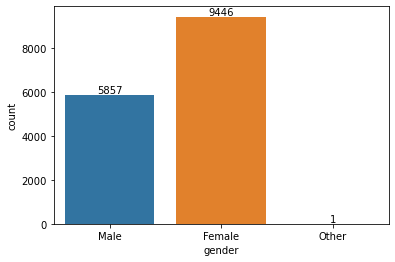

In [10]:
ax = sbn.countplot(x = train_data['gender'])
ax.bar_label(ax.containers[0]);

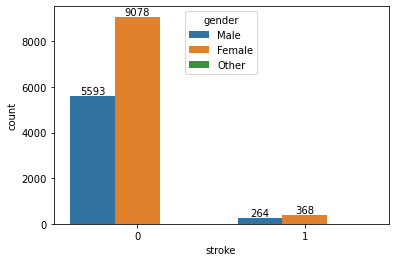

In [13]:
ax = sbn.countplot(x = train_data['stroke'], hue = train_data['gender'])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);

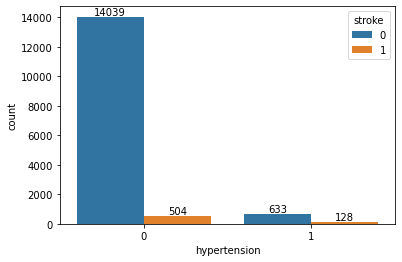

In [12]:
ax = sbn.countplot(x = train_data['hypertension'], hue = train_data['stroke'])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);

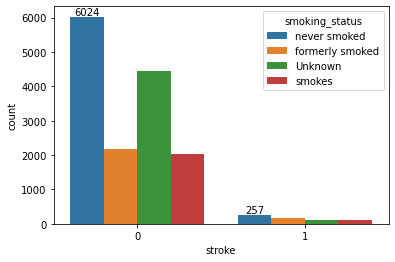

In [15]:
ax = sbn.countplot(x = train_data['stroke'], hue = train_data['smoking_status'])
ax.bar_label(ax.containers[0]);

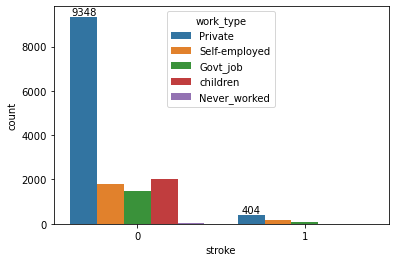

In [16]:
ax = sbn.countplot(x = train_data['stroke'], hue = train_data['work_type'])
ax.bar_label(ax.containers[0]);

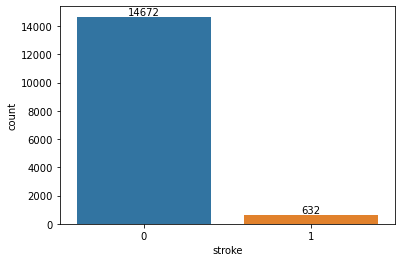

In [14]:
ax = sbn.countplot(x = train_data['stroke'])
ax.bar_label(ax.containers[0]);

### sozel verileri sayısala çevirelim

In [18]:
train_data.shape, test_data.shape

((15304, 11), (10204, 10))

In [19]:
df = train_data.append(test_data)

In [20]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
11531,Female,27.0,0,0,No,Private,Urban,69.01,22.5,never smoked,0.0
1885,Male,11.0,0,0,No,children,Urban,73.65,23.0,Unknown,0.0
6570,Female,53.0,0,0,Yes,Private,Rural,89.30,32.3,Unknown,NaN
6808,Male,47.0,0,0,Yes,Private,Urban,104.70,30.0,Unknown,NaN
6699,Female,45.0,0,0,Yes,Private,Urban,85.06,21.6,never smoked,0.0


In [22]:
label_encoder = LabelEncoder()
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [29]:
abs(df.corr()['stroke']).sort_values(ascending = False)

stroke               1.000000
age                  0.261320
avg_glucose_level    0.149273
hypertension         0.145895
ever_married         0.114010
heart_disease        0.111518
bmi                  0.065393
smoking_status       0.036189
work_type            0.031777
Residence_type       0.000331
Name: stroke, dtype: float64

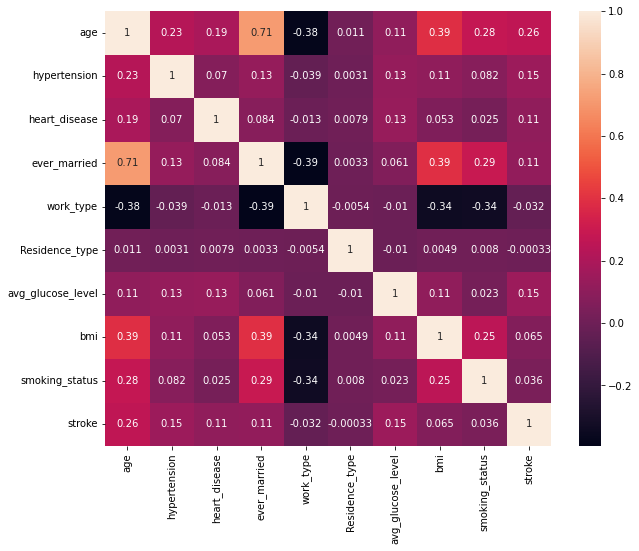

In [31]:
plt.figure(figsize = (10, 8))
sbn.heatmap(df.corr(), annot = True);

In [24]:
train = df[:15304]
test = df[15304:]

In [25]:
x = train.drop('stroke', axis = 1)
y = train['stroke']
x = pd.get_dummies(x, drop_first = True)

### sampling

In [28]:
over = SMOTE()

x, y = over.fit_resample(x, y)
labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0.0: 14672, 1.0: 14672})


### model eğitimi

In [34]:
def classification(x, y):
    model1 = LogisticRegression()
    model2 = DecisionTreeClassifier()
    model3 = RandomForestClassifier()
    model4 = BernoulliNB()
    model5= GaussianNB()
    model6 = SVC()
    model7 = GradientBoostingClassifier()
    model8 = AdaBoostClassifier()
    model9 = HistGradientBoostingClassifier()
    model10 = BaggingClassifier()
    model11 = XGBClassifier()
    
    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11]
    model_names = ['Logistic', 'Decision', 'Random', 'Bernoulli', 'Gaussian', 'Support', 'Gradient',
                  'AdaBoost', 'Hist', 'Bagging', 'XGBoost']
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    # x_train = MinMaxScaler().fit_transform(x_train)
    # x_test = MinMaxScaler().fit_transform(x_test)
    
    acc = []
    #cnf_matrix = confusion_matrix()
    skor = pd.DataFrame(columns = ['Accuracy'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
        
    skor['Accuracy'] = acc
                                   
    print(skor.sort_values('Accuracy', ascending = False))
        
    plt.figure(figsize=(10, 6))
    sbn.barplot(data = skor, y ='Accuracy', x = skor.index, color = 'lightblue')
    for i, v in enumerate(skor['Accuracy']):
        plt.text(i, v, str(round(v, 2)), color='black', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Scores of Classification Models')
    plt.show()

            Accuracy
Random     93.729767
Bagging    88.601125
Hist       87.220992
Support    86.352019
Decision   85.687511
Gradient   85.568240
AdaBoost   84.579997
Logistic   83.438405
XGBoost    82.825013
Bernoulli  79.246890
Gaussian   78.701653


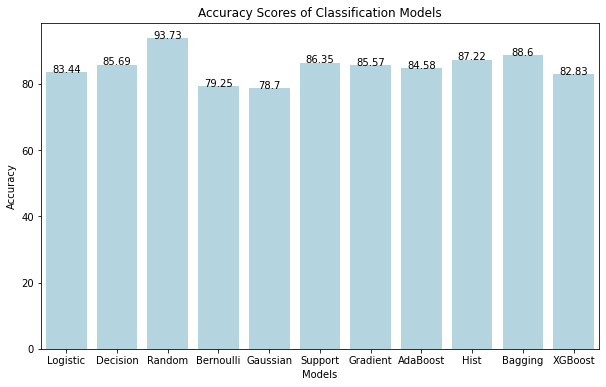

In [35]:
classification(x, y)

### Derin Öğrenme

In [36]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [37]:
model = Sequential()
model.add(Dense(units = 65, activation = 'relu'))
model.add(Dense(units = 112, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy') 

In [38]:
early = EarlyStopping(monitor = 'val_accuracy', patience = 10, mode = 'max')

In [39]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_true), epochs = 100, batch_size = 32, verbose = 1, callbacks = [early])

Epoch 1/100
734/734 [==============================] - 14s 15ms/step - loss: 0.3797 - accuracy: 0.8279 - val_loss: 0.3430 - val_accuracy: 0.8467
Epoch 2/100
734/734 [==============================] - 11s 15ms/step - loss: 0.3448 - accuracy: 0.8486 - val_loss: 0.3358 - val_accuracy: 0.8487
Epoch 3/100
734/734 [==============================] - 11s 15ms/step - loss: 0.3360 - accuracy: 0.8536 - val_loss: 0.3279 - val_accuracy: 0.8589
Epoch 4/100
734/734 [==============================] - 11s 15ms/step - loss: 0.3240 - accuracy: 0.8579 - val_loss: 0.3276 - val_accuracy: 0.8560
Epoch 5/100
734/734 [==============================] - 11s 15ms/step - loss: 0.3194 - accuracy: 0.8612 - val_loss: 0.3105 - val_accuracy: 0.8659
Epoch 6/100
734/734 [==============================] - 12s 17ms/step - loss: 0.3097 - accuracy: 0.8660 - val_loss: 0.3150 - val_accuracy: 0.8633
Epoch 7/100
734/734 [==============================] - 13s 17ms/step - loss: 0.3020 - accuracy: 0.8685 - val_loss: 0.3042 - val_ac

734/734 [==============================] - 12s 17ms/step - loss: 0.1252 - accuracy: 0.9554 - val_loss: 0.2861 - val_accuracy: 0.9262
Epoch 58/100
734/734 [==============================] - 12s 17ms/step - loss: 0.1247 - accuracy: 0.9546 - val_loss: 0.4252 - val_accuracy: 0.9261
Epoch 59/100
734/734 [==============================] - 14s 20ms/step - loss: 0.1606 - accuracy: 0.9488 - val_loss: 0.2572 - val_accuracy: 0.9169
Epoch 60/100
734/734 [==============================] - 13s 18ms/step - loss: 0.1287 - accuracy: 0.9530 - val_loss: 0.3345 - val_accuracy: 0.9266
Epoch 61/100
734/734 [==============================] - 12s 16ms/step - loss: 0.1473 - accuracy: 0.9501 - val_loss: 0.2330 - val_accuracy: 0.9213
Epoch 62/100
734/734 [==============================] - 12s 16ms/step - loss: 0.1243 - accuracy: 0.9557 - val_loss: 0.2719 - val_accuracy: 0.9267
Epoch 63/100
734/734 [==============================] - 12s 16ms/step - loss: 0.1726 - accuracy: 0.9485 - val_loss: 0.2408 - val_accuracy

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                780       
                                                                 
 dense_1 (Dense)             (None, 112)               7392      
                                                                 
 dense_2 (Dense)             (None, 100)               11300     
                                                                 
 dense_3 (Dense)             (None, 128)               12928     
                                                                 
 dense_4 (Dense)             (None, 512)               66048     
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               2

<AxesSubplot:>

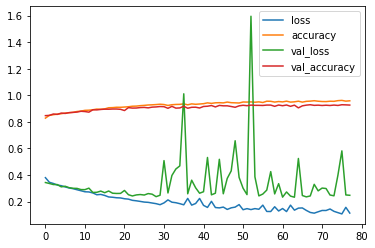

In [41]:
loss = pd.DataFrame(history.history)
loss.plot()

In [42]:
tahmin = model.predict(x_test)
tahmin = [1 if tahmin >= 0.5 else 0 for tahmin in tahmin]
accuracy_score(tahmin, y_true) * 100

184/184 [==============================] - 1s 3ms/step


92.62225251320497

### tahmin.csv dosyası

In [43]:
sonuc = pd.DataFrame(columns = ['id', 'stroke'])
sonuc['id'] = sample_submission['id']

In [51]:
test = df[15304:]
test.drop('stroke', axis = 1, inplace = True)
test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,1,2,0,82.54,33.4,0
1,Male,70.0,1,0,1,2,1,72.06,28.5,0
2,Female,5.0,0,0,0,4,1,103.72,19.5,0
3,Female,56.0,0,0,1,0,1,69.24,41.4,3
4,Male,32.0,0,0,1,2,0,111.15,30.1,3
...,...,...,...,...,...,...,...,...,...,...
10199,Female,27.0,0,0,0,2,1,75.77,17.6,2
10200,Male,49.0,0,0,1,2,1,102.91,26.7,0
10201,Female,3.0,0,0,0,4,0,104.04,18.3,0
10202,Male,31.0,0,0,1,2,1,82.41,28.7,2


In [52]:
test = pd.get_dummies(test, drop_first = True)

In [58]:
tahmin = model.predict(test)
tahmin

319/319 [==============================] - 1s 2ms/step


array([[9.9517721e-01],
       [9.9517721e-01],
       [2.3028257e-15],
       ...,
       [1.8707853e-22],
       [4.2790235e-03],
       [1.7307877e-22]], dtype=float32)

In [59]:
tahmin = [1 if tahmin >= 0.5 else 0 for tahmin in tahmin]
tahmin

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,


In [60]:
sonuc['stroke'] = tahmin

In [61]:
sonuc

,id,stroke
0,15304,1
1,15305,1
2,15306,0
3,15307,1
4,15308,0
...,...,...
10199,25503,0
10200,25504,1
10201,25505,0
10202,25506,0


In [62]:
sonuc.to_csv('tahmin_DL.csv', index = False)